### **Group Project**

#### **Imports**

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import gensim
from sklearn.neighbors import KNeighborsClassifier
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
# nltk.download('stopwords')
from nltk.stem import PorterStemmer, WordNetLemmatizer
# nltk.download('wordnet')
import re
import plotly.express as px
from sklearn.decomposition import PCA
from gensim.parsing.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')


#### **Reading the data**

In [283]:
songs_df = pd.read_csv('tcc_ceds_music.csv')
songs_df.drop(songs_df.columns[0], axis=1, inplace=True)
songs_df

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,0.001284,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,0.001504,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [284]:
songs_df = songs_df.drop(['artist_name', 'release_date', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic',
       'age'], axis=1)

songs_df

,track_name,genre,lyrics
0,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...
1,i believe,pop,believe drop rain fall grow believe darkest ni...
2,cry,pop,sweetheart send letter goodbye secret feel bet...
3,patricia,pop,kiss lips want stroll charm mambo chacha merin...
4,apopse eida oneiro,pop,till darling till matter know till dream live ...
...,...,...,...
28367,10 million ways,hip hop,cause fuck leave scar tick tock clock come kno...
28368,ante up (robbin hoodz theory),hip hop,minks things chain ring braclets yap fame come...
28369,whutcha want?,hip hop,get ban get ban stick crack relax plan attack ...
28370,switch,hip hop,check check yeah yeah hear thing call switch g...


In [285]:
books_df = pd.read_csv('Book_Dataset_1.csv')
books_df.drop(books_df.columns[0], axis=1, inplace=True)
books_df

,Title,Category,Price,Price_After_Tax,Tax_amount,Avilability,Number_of_reviews,Book_Description,Image_Link,Stars
0,A Light in the Attic,Poetry,51.77,51.77,0.0,22,0,It's hard to imagine a world without A Light i...,http://books.toscrape.com/media/cache/fe/72/fe...,3
1,Tipping the Velvet,Historical Fiction,53.74,53.74,0.0,20,0,"""Erotic and absorbing...Written with starling ...",http://books.toscrape.com/media/cache/08/e9/08...,1
2,Soumission,Fiction,50.10,50.10,0.0,20,0,"Dans une France assez proche de la nÃ´tre, un ...",http://books.toscrape.com/media/cache/ee/cf/ee...,1
3,Sharp Objects,Mystery,47.82,47.82,0.0,20,0,"WICKED above her hipbone, GIRL across her hear...",http://books.toscrape.com/media/cache/c0/59/c0...,4
4,Sapiens: A Brief History of Humankind,History,54.23,54.23,0.0,20,0,From a renowned historian comes a groundbreaki...,http://books.toscrape.com/media/cache/ce/5f/ce...,5
...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,55.53,55.53,0.0,1,0,\n\n\n\n\n\n,http://books.toscrape.com/media/cache/99/df/99...,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,57.06,57.06,0.0,1,0,High school student Kei Nagai is struck dead i...,http://books.toscrape.com/media/cache/30/98/30...,4
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,16.97,16.97,0.0,1,0,"In Englandâs Regency era, manners and elegan...",http://books.toscrape.com/media/cache/f9/6b/f9...,5
998,1st to Die (Women's Murder Club #1),Mystery,53.98,53.98,0.0,1,0,"James Patterson, bestselling author of the Ale...",http://books.toscrape.com/media/cache/f6/8e/f6...,1


In [286]:
books_df = books_df.drop(['Price', 'Price_After_Tax', 'Tax_amount',
       'Avilability', 'Number_of_reviews', 'Image_Link',
       'Stars'], axis=1)

books_df

,Title,Category,Book_Description
0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ..."
2,Soumission,Fiction,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,\n\n\n\n\n\n
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,High school student Kei Nagai is struck dead i...
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,"In Englandâs Regency era, manners and elegan..."
998,1st to Die (Women's Murder Club #1),Mystery,"James Patterson, bestselling author of the Ale..."


### **Cleaning the data**

In [287]:
# Remove punctuation from the lyrics column
songs_df['lyrics'] = songs_df['lyrics'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove digits from the lyrics column
songs_df['lyrics'] = songs_df['lyrics'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))

# Convert all lyrics to lowercase
songs_df['lyrics'] = songs_df['lyrics'].apply(lambda x: x.lower())

# Remove stopwords from the lyrics column
stopwords = nltk.corpus.stopwords.words('english')
songs_df['lyrics'] = songs_df['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# Lemmatize the lyrics column
lemmatizer = WordNetLemmatizer()
songs_df['lyrics'] = songs_df['lyrics'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

songs_df

,track_name,genre,lyrics
0,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...
1,i believe,pop,believe drop rain fall grow believe darkest ni...
2,cry,pop,sweetheart send letter goodbye secret feel bet...
3,patricia,pop,kiss lip want stroll charm mambo chacha mering...
4,apopse eida oneiro,pop,till darling till matter know till dream live ...
...,...,...,...
28367,10 million ways,hip hop,cause fuck leave scar tick tock clock come kno...
28368,ante up (robbin hoodz theory),hip hop,mink thing chain ring braclets yap fame come f...
28369,whutcha want?,hip hop,get ban get ban stick crack relax plan attack ...
28370,switch,hip hop,check check yeah yeah hear thing call switch g...


In [288]:
# If the Title is duplicated, remove the duplicates
books_df = books_df.drop_duplicates(subset=['Title'])

# Remove floats from the description column
def remove_floats(text):
    return re.sub(r'\d+\.\d+', '', text)

books_df['Book_Description'] = books_df['Book_Description'].astype(str)
books_df['Book_Description'] = books_df['Book_Description'].apply(remove_floats)

# Remove digits from the description column
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: x.translate(str.maketrans('', '', string.digits)))

# Remove punctuation from the description column
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Convert all descriptions to lowercase
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: x.lower())

# Remove stopwords from the description column
stopwords = nltk.corpus.stopwords.words('english')
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# Stem the description column
stemmer = PorterStemmer()
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Lemmatize the description column
lemmatizer = WordNetLemmatizer()
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# access the book_description column and do line = line_raw.decode('utf-8') on each description
books_df['Book_Description'] = books_df['Book_Description'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

books_df

,Title,Category,Book_Description
0,A Light in the Attic,Poetry,hard imagin world without light attic nowclass...
1,Tipping the Velvet,Historical Fiction,erot absorbingwritten starl powerth new york t...
2,Soumission,Fiction,dan un franc assez proch de la ntre un homm se...
3,Sharp Objects,Mystery,wick hipbon girl across heart word like road m...
4,Sapiens: A Brief History of Humankind,History,renown historian come groundbreak narr humanit...
...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,high school student kei nagai struck dead griz...
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,england regenc era manner eleg reign public li...
998,1st to Die (Women's Murder Club #1),Mystery,jame patterson bestsel author alex cross novel...


### **Visualizing the didtribution of the data**

##### **For Books Data**

In [289]:
# Create an instance of the CountVectorizer class
tf_vectorizer = CountVectorizer(max_df=0.5, min_df=2, stop_words='english', lowercase=True)

# Fit and transform the vectorizer on the corpus
dtm_tf = tf_vectorizer.fit_transform(books_df['Book_Description'])

# Instantiate a new TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

# Fit and transform the tfidf_vectorizer on the corpus
dtm_tfidf = tfidf_vectorizer.fit_transform(books_df['Book_Description'])

In [290]:
# Train and fit the LDA models
lda_tf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tf.fit(dtm_tf)

# Train and fit the LDA models on the TF-IDF vectors
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tfidf.fit(dtm_tfidf)

# Prepare the visualization
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

# Display the visualization
pyLDAvis.display(panel)

##### As we can see from the above graph, the words in cluster 1 include words from general books like book, story, proper names etc. So, we can say that cluster 1 is the cluster of general books.

##### The words in cluster 2 mostly relate to Literature & Fiction. So, we can say that cluster 2 is the cluster of Literature & Fiction books.

##### The words in cluster 3 mostly relate to Thriller, Mystery, Crime, Horror, etc. So, we can say that cluster 3 is the cluster of Thriller, Mystery, Crime, Horror, etc. books.

##### The words in cluster 4 mostly relate to Science Fiction & Fantasy. So, we can say that cluster 4 is the cluster of Science Fiction & Fantasy books.

##### The words in cluster 5 mostly relate to cooking, food, etc. So, we can say that cluster 5 is the cluster of cooking, food, etc. books.

##### **For Songs Data**

In [291]:
# Create an instance of the CountVectorizer class
tf_vectorizer = CountVectorizer(max_df=0.5, min_df=2, stop_words='english', lowercase=True)

# Fit and transform the vectorizer on the corpus
dtm_tf = tf_vectorizer.fit_transform(songs_df['lyrics'])

# Instantiate a new TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

# Fit and transform the tfidf_vectorizer on the corpus
dtm_tfidf = tfidf_vectorizer.fit_transform(songs_df['lyrics'])

In [292]:
# Train and fit the LDA models
lda_tf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tf.fit(dtm_tf)

# Train and fit the LDA models on the TF-IDF vectors
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tfidf.fit(dtm_tfidf)

# prepare the visualization
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

# display the visualization
pyLDAvis.display(panel)

##### As we can see from the above graph, the words in cluster 1 include words from romantic or sad songs. So, we can say that cluster 1 is the cluster of romantic or sad songs. Basically, it's about love and it's consequences.

##### Cluster 2 is the cluster of songs about nature or using nature as a metaphor, since it has words like spring, winter, sky, etc.

##### Cluster 3 is the cluster of songs about money and seems mostly to be rap/hip-hop songs.

##### Cluster 4 is the cluster of songs about revenge and negative emotions, since it has words like evil, death, etc.

##### Cluster 5 is the cluster of party songs, since it has words like party, bass, rockin, etc.

### **Training the Model**

#### **Training the model for Books Data**

In [293]:
# Create tagged documents 
# the review is the document and title is the tag
tagged_documents = []
for _, row in books_df.iterrows():
    tag = row['Title']
    words = row['Book_Description'].split()  # Split the description into words
    tagged_doc = TaggedDocument(words=words, tags=[tag])
    tagged_documents.append(tagged_doc)


#### Hyperparameter Tuning

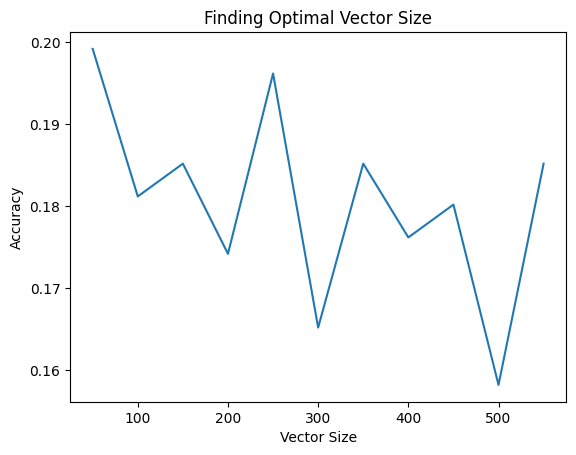

In [294]:
# Find the optimal vector size for the doc2vec model
vector_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
vector_size_scores = []

for size in vector_sizes:
    # Train a Doc2Vec model
    model = Doc2Vec(dm=1, vector_size=size, window=5, min_count=1, epochs=10, workers=4)
    model.build_vocab(tagged_documents)
    model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)
    
    # Get the document vectors
    doc_vectors = []
    for tag in books_df['Title']:
        doc_vectors.append(model.docvecs[tag])
    
    # Get the accuracy of the model
    knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
    knn.fit(doc_vectors, books_df['Title'])
    accuracy = knn.score(doc_vectors, books_df['Title'])
    
    # Append the accuracy to the list of scores
    vector_size_scores.append(accuracy)

# Plot the accuracies by vector size
plt.plot(vector_sizes, vector_size_scores)
plt.xlabel('Vector Size')
plt.ylabel('Accuracy')
plt.title('Finding Optimal Vector Size')
plt.show()


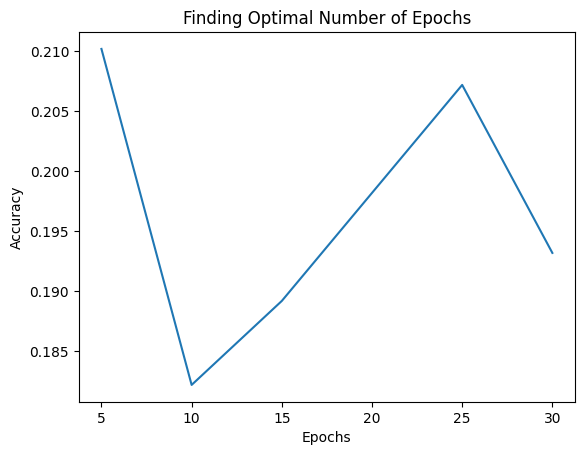

In [295]:
# Find optimal number of epochs
epochs = [5, 10, 15, 20, 25, 30]
epoch_scores = []

for epoch in epochs:
    # Train a Doc2Vec model
    model = Doc2Vec(dm=1, vector_size=250, window=5, min_count=1, epochs=epoch, workers=4)
    model.build_vocab(tagged_documents)
    model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)
    
    # Get the document vectors
    doc_vectors = []
    for tag in books_df['Title']:
        doc_vectors.append(model.docvecs[tag])
    
    # Get the accuracy of the model
    knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
    knn.fit(doc_vectors, books_df['Title'])
    accuracy = knn.score(doc_vectors, books_df['Title'])
    
    # Append the accuracy to the list of scores
    epoch_scores.append(accuracy)

# Plot the accuracies by number of epochs
plt.plot(epochs, epoch_scores)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Finding Optimal Number of Epochs')
plt.show()

In [296]:
# Train a Doc2Vec model with the optimal parameters
book_model = Doc2Vec(tagged_documents, vector_size=250, window=5, epochs=20, dm=0, min_count=2)

In [297]:
# Create a dataframe of the vectors from each book
vectors_df = pd.DataFrame()
for _, row in books_df.iterrows():
    vectors_df = vectors_df.append(pd.Series(book_model.dv[row['Title']]), ignore_index=True)

vectors_df

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.125986,-0.134286,-0.208127,0.198773,-0.083731,0.355222,-0.309607,0.105951,-0.223053,-0.113557,...,0.075367,-0.071757,0.089066,-0.390910,-0.009924,-0.106461,0.025354,0.050090,-0.212746,-0.212347
1,0.100675,-0.237147,-0.118059,0.165274,0.088617,0.382351,-0.294613,0.146485,-0.142892,0.014110,...,0.137765,0.043280,0.106360,-0.379633,0.176896,-0.187657,-0.046869,0.110423,-0.150503,-0.155043
2,0.129714,-0.167695,0.006831,0.123053,0.197091,0.230882,-0.169054,0.033550,-0.192549,0.042341,...,0.178395,-0.113729,0.255381,-0.235503,0.158753,-0.076846,0.027550,0.154444,-0.134532,-0.011726
3,0.159824,-0.263061,0.038184,0.371639,-0.008663,0.108378,-0.240213,0.014529,-0.212781,-0.093625,...,0.184182,-0.299614,0.017319,-0.280541,0.252122,-0.288470,-0.158535,0.147105,-0.193191,-0.013530
4,0.115786,-0.106272,-0.095703,0.095093,-0.144928,0.327021,-0.037968,-0.038685,0.073160,0.013647,...,-0.119213,-0.102146,0.029855,-0.331512,-0.040126,-0.072731,-0.011632,-0.025591,-0.192138,-0.166814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.000661,-0.000949,0.003678,-0.000811,0.001363,-0.000782,0.002704,-0.002084,-0.000451,0.000620,...,-0.003736,-0.003848,-0.001271,-0.003767,-0.001639,0.003795,-0.001157,-0.001085,0.001076,-0.000658
995,0.116849,-0.088660,0.061082,0.284749,-0.066937,0.090207,-0.206457,0.117978,-0.119008,-0.007696,...,0.098632,-0.195024,0.093346,-0.326273,0.058103,-0.294954,-0.119917,0.088749,-0.145704,-0.133858
996,0.233469,-0.237575,0.008698,0.275675,-0.015731,0.079336,-0.190616,0.166078,-0.148240,0.116273,...,0.174959,-0.203077,0.049334,-0.120067,0.033356,-0.286952,-0.134191,0.127223,-0.123986,-0.102581
997,0.141325,-0.316899,-0.035160,0.112571,0.018999,0.044731,-0.193888,0.217824,-0.350917,0.099951,...,0.175349,0.075521,0.005117,-0.504119,0.286035,-0.356025,-0.150091,0.200507,-0.205030,-0.218359


### Using PCA to reduce the dimensions of the data

In [298]:
# Create an instance PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to the vectors
pca.fit(vectors_df)

# Transform the vectors and store in a new dataframe
pca_df = pd.DataFrame(pca.transform(vectors_df), columns=['pca_1', 'pca_2', 'pca_3'])

# Add the book titles to the dataframe
pca_df["Title"] = books_df["Title"]


In [299]:
# Append the vectors to the main dataframe
books_df["Vec1"] = pca_df["pca_1"]
books_df["Vec2"] = pca_df["pca_2"]
books_df["Vec3"] = pca_df["pca_3"]

In [300]:
# Removing the unwanted rows
books_df = books_df[books_df['Category'] != 'Default']
books_df = books_df[books_df['Category'] != 'Add a comment']
books_df = books_df.dropna()
books_df

,Title,Category,Book_Description,Vec1,Vec2,Vec3
0,A Light in the Attic,Poetry,hard imagin world without light attic nowclass...,0.514689,0.446421,0.105085
1,Tipping the Velvet,Historical Fiction,erot absorbingwritten starl powerth new york t...,-0.219717,0.022567,-0.089398
2,Soumission,Fiction,dan un franc assez proch de la ntre un homm se...,0.478949,-0.327231,-0.570650
3,Sharp Objects,Mystery,wick hipbon girl across heart word like road m...,-1.047820,0.030745,-0.091382
4,Sapiens: A Brief History of Humankind,History,renown historian come groundbreak narr humanit...,1.273516,-0.855692,0.110162
...,...,...,...,...,...,...
994,Beyond Good and Evil,Philosophy,friedrich nietzsch beyond good evil translat g...,-0.063919,-0.224519,-0.212188
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,,-0.517046,-0.267148,0.162447
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,high school student kei nagai struck dead griz...,-0.749503,-0.380599,-0.561633
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,england regenc era manner eleg reign public li...,-0.301698,-0.223744,-0.064041


In [301]:
# A scatter plot of the vectors using Poltly Express
fig = px.scatter_3d(x=books_df["Vec1"], y=books_df["Vec2"], z=books_df["Vec3"], color=books_df["Category"], 
                    opacity=0.6, title="Vector Represention of Book Reviews", hover_name=books_df["Title"])
fig.update_traces(marker=dict(size=5))
fig.show()

#### **Training the model for Songs Data**

In [302]:
# Creating tagged documents for songs
# the lyrics are documents and song name are tags
tagged_documents = []
for _, row in songs_df.iterrows():
    tag = row['track_name']
    words = row['lyrics'].split()  # Split the description into words
    tagged_doc = TaggedDocument(words=words, tags=[tag])
    tagged_documents.append(tagged_doc)


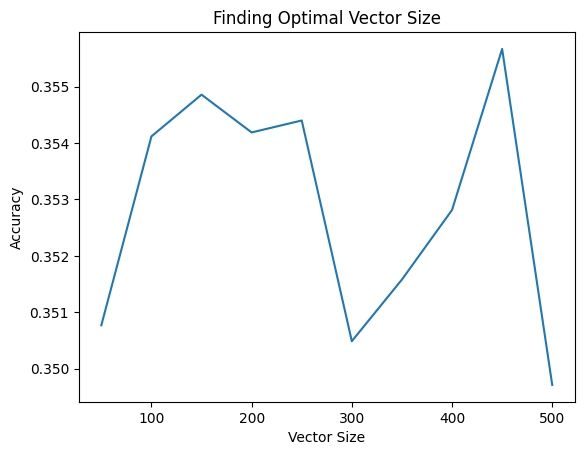

In [303]:
# Find the optimal vector size for the doc2vec model
# Takes a bit of time to run please grab a snacc
vector_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
vector_size_scores = []

for size in vector_sizes:
    # Train a Doc2Vec model
    model = Doc2Vec(dm=1, vector_size=size, window=5, min_count=1, epochs=10, workers=4)
    model.build_vocab(tagged_documents)
    model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)
    
    # Get the document vectors
    doc_vectors = []
    for tag in songs_df['track_name']:
        doc_vectors.append(model.docvecs[tag])
    
    # Get the accuracy of the model
    knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
    knn.fit(doc_vectors, songs_df['track_name'])
    accuracy = knn.score(doc_vectors, songs_df['track_name'])
    
    # Append the accuracy to the list of scores
    vector_size_scores.append(accuracy)

# Plot the accuracies by vector size
plt.plot(vector_sizes, vector_size_scores)
plt.xlabel('Vector Size')
plt.ylabel('Accuracy')
plt.title('Finding Optimal Vector Size')
plt.show()

In [304]:
# Train a Doc2Vec model with the optimal parameters
songs_model = Doc2Vec(tagged_documents, vector_size=250, window=5, epochs=20, dm=0, min_count=2)

In [305]:
# Create a dataframe of the vectors from each song
vectors_df = pd.DataFrame()
for _, row in songs_df.iterrows():
    vectors_df = vectors_df.append(pd.Series(songs_model.dv[row['track_name']]), ignore_index=True)

vectors_df

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.079329,-0.121775,0.319921,0.510957,-0.156860,0.496622,-0.680988,0.010218,0.013013,-0.158540,...,0.193044,0.098147,0.224634,-0.450411,0.103851,0.021395,-0.129351,0.151399,-0.476161,-0.311572
1,-0.244631,-0.287924,-0.215484,0.130992,-0.786811,0.485428,-0.202465,0.327155,0.803550,-0.564224,...,0.453741,0.036631,0.384822,-0.651473,0.427775,0.348023,0.045341,0.619570,-0.366215,0.049088
2,0.459586,-0.915454,-0.157527,0.235690,-0.144305,0.162279,-1.088888,-0.536995,-0.149827,0.146872,...,0.350723,-0.038070,0.008792,-0.643660,-0.022559,-0.053491,-0.056392,-0.192774,-0.444704,-0.058033
3,0.245212,-0.220345,0.173390,0.185150,-0.192134,-0.019466,-0.126326,-0.043852,0.189401,0.024010,...,0.315002,-0.237030,0.093459,-0.134605,0.248575,-0.214488,-0.081471,-0.081324,0.151182,-0.279519
4,-0.064847,-0.116291,0.062257,0.197666,0.234357,-0.264143,-0.194937,-0.011725,-0.051729,0.134893,...,0.508582,0.106431,-0.167247,-0.628752,0.350395,0.137009,0.171413,0.291993,-0.028600,-0.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,-0.017050,-0.009198,0.529628,0.349188,-0.183875,-0.140498,0.072529,-0.025208,-0.234255,0.180366,...,0.123462,-0.362883,0.220852,0.185299,0.259072,-0.024943,0.038733,0.054038,0.107352,-0.372466
28368,-0.323359,-0.082779,0.003196,0.143972,-0.299255,-0.066868,-0.003620,0.166023,0.011467,-0.175934,...,0.162580,-0.105191,0.383803,-0.343654,0.219364,0.134709,0.142218,0.006665,-0.204714,-0.043925
28369,-0.245078,-0.051866,0.348745,-0.133305,-0.229082,0.372596,-0.029497,0.207204,0.273675,-0.140377,...,0.400499,0.008919,0.146449,0.041508,0.331747,-0.190355,-0.194434,-0.135607,-0.038811,-0.015155
28370,-0.020800,0.025014,0.375777,0.245718,-0.240728,0.274137,-0.383484,0.002351,-0.289886,-0.232256,...,0.600935,-0.200728,0.025012,0.270081,0.144286,-0.016467,-0.195551,-0.145270,-0.138721,-0.072248


#### Using PCA to reduce the dimentions of the data

In [306]:
# Create an instance PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to the vectors
pca.fit(vectors_df)

# Transform the vectors and store in a new dataframe
pca_df = pd.DataFrame(pca.transform(vectors_df), columns=['pca_1', 'pca_2', 'pca_3'])

# Add the book titles to the dataframe
pca_df["track_name"] = songs_df["track_name"]

# Append the vectors to the main dataframe
songs_df["Vec1"] = pca_df["pca_1"]
songs_df["Vec2"] = pca_df["pca_2"]
songs_df["Vec3"] = pca_df["pca_3"]

# Drop duplicates from the track_name column
songs_df = songs_df.drop_duplicates(subset=['track_name'])

songs_df

,track_name,genre,lyrics,Vec1,Vec2,Vec3
0,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...,-0.749451,-0.408240,-0.731984
1,i believe,pop,believe drop rain fall grow believe darkest ni...,-0.560508,0.065716,-0.419036
2,cry,pop,sweetheart send letter goodbye secret feel bet...,-0.848118,-0.403242,0.360070
3,patricia,pop,kiss lip want stroll charm mambo chacha mering...,0.405995,-0.304405,1.346172
4,apopse eida oneiro,pop,till darling till matter know till dream live ...,-0.995250,0.482156,0.091224
...,...,...,...,...,...,...
28367,10 million ways,hip hop,cause fuck leave scar tick tock clock come kno...,1.450801,-0.339532,0.054577
28368,ante up (robbin hoodz theory),hip hop,mink thing chain ring braclets yap fame come f...,1.126433,-0.068075,0.031647
28369,whutcha want?,hip hop,get ban get ban stick crack relax plan attack ...,1.450763,0.087439,-0.251929
28370,switch,hip hop,check check yeah yeah hear thing call switch g...,1.183964,-0.930709,-0.044658


### **Finding similar songs**

In [307]:
songs_df

,track_name,genre,lyrics,Vec1,Vec2,Vec3
0,mohabbat bhi jhoothi,pop,hold time feel break feel untrue convince spea...,-0.749451,-0.408240,-0.731984
1,i believe,pop,believe drop rain fall grow believe darkest ni...,-0.560508,0.065716,-0.419036
2,cry,pop,sweetheart send letter goodbye secret feel bet...,-0.848118,-0.403242,0.360070
3,patricia,pop,kiss lip want stroll charm mambo chacha mering...,0.405995,-0.304405,1.346172
4,apopse eida oneiro,pop,till darling till matter know till dream live ...,-0.995250,0.482156,0.091224
...,...,...,...,...,...,...
28367,10 million ways,hip hop,cause fuck leave scar tick tock clock come kno...,1.450801,-0.339532,0.054577
28368,ante up (robbin hoodz theory),hip hop,mink thing chain ring braclets yap fame come f...,1.126433,-0.068075,0.031647
28369,whutcha want?,hip hop,get ban get ban stick crack relax plan attack ...,1.450763,0.087439,-0.251929
28370,switch,hip hop,check check yeah yeah hear thing call switch g...,1.183964,-0.930709,-0.044658


In [308]:
# Get mean vectors for each song
# the key is the song name and value is the mean vector
vecs = [songs_model.dv[i] for i in range(len(songs_model.dv))]
tags = [songs_model.dv.index_to_key[i] for i in range(len(songs_model.dv))]

vec_mean = {}
for i in range(len(vecs)):
    vec_mean[tags[i]] = np.mean(vecs[i])


In [309]:
# Retrieve similar songs
similar_songs = songs_model.dv.most_similar('little toy guns')

# Extract the similar song tags
similar_song_tags = [song_tag for song_tag, similarity in similar_songs]

# Retrieve the 3 vectors of similar songs from songs_df
similar_songs_df = songs_df[songs_df['track_name'].isin(similar_song_tags)]


In [310]:
# Visualizing the similar songs
vecs_x = []
vecs_y = []
vecs_z = []
for i in range(len(similar_songs_df)):
    vecs_x.append(similar_songs_df.iloc[i]['Vec1'])
    vecs_y.append(similar_songs_df.iloc[i]['Vec2'])
    vecs_z.append(similar_songs_df.iloc[i]['Vec3'])

song_names = similar_song_tags

# add the vector of the song we are comparing to
vecs_x.append(songs_df[songs_df['track_name'] == 'little toy guns']['Vec1'].values[0])
vecs_y.append(songs_df[songs_df['track_name'] == 'little toy guns']['Vec2'].values[0])
vecs_z.append(songs_df[songs_df['track_name'] == 'little toy guns']['Vec3'].values[0])
song_names.append('little toy guns')

fig = px.scatter_3d(x=vecs_x, y=vecs_z, z=vecs_y, color=song_names, opacity=0.7, title="Vectors of songs similar to little toy guns")

fig.show()

### **Finally!!: Finding Songs Similar to Book using Cosine Similarity.**


### Using a function we built ourselves to find the cosine similarity between two vectors (YAY!!)

In [311]:
# Get the book Sharp Objects
book = books_df[books_df['Title'] == 'Sharp Objects']

# sharp objects
# this is where it ends

# Get 3 vectors for the book from the books_model
book_vecs = []
for i in range(3):
    book_vecs.append(book.iloc[0]['Vec' + str(i+1)])

# Get 250 vectors for the book from the books_model
book_vecs_250 = book_model.dv['Sharp Objects']

In [312]:
# Get the mean vector of the book vector
book_vector_mean = np.mean(book_vecs)

In [313]:
# Get 5 songs that are similar to the book by using cosine similarity
def recommend_songs(book_vector_mean, vec_mean, num_songs=5):

    # Reshape book_vector_mean to 2D array
    book_vector_mean = np.reshape(book_vector_mean, (1, -1))

   # Reshape song vectors in vec_mean and remove additional dimension
    vec_mean_2d = {song: np.reshape(vec, (-1,)) for song, vec in vec_mean.items()}

    # Calculate cosine similarity between book vector mean and song vectors
    similarities = cosine_similarity(book_vector_mean, list(vec_mean_2d.values()))[0]

    # Sort indices based on cosine similarity in descending order
    sorted_indices = np.argsort(similarities)[::-1]

    # Get top N song names with highest cosine similarity
    recommended_songs = [list(vec_mean_2d.keys())[idx] for idx in sorted_indices[:num_songs]]

    return recommended_songs

rec_songs = recommend_songs(book_vector_mean, vec_mean, num_songs=5)


In [314]:
# Retrive the 3D vectors of the recommended songs from songs_df
rec_songs_df = songs_df[songs_df['track_name'].isin(rec_songs)]
rec_songs_df

,track_name,genre,lyrics,Vec1,Vec2,Vec3
5931,find your love,pop,option refuse forget take heart feel take bett...,-0.476375,-0.713122,-0.104595
17226,the man that got away,jazz,night bitter star lose glitter wind grow colde...,-0.517802,0.327673,0.017602
17227,money burns a hole in my pocket,jazz,money burn hole pocket wish million dollar pre...,0.434736,-0.305497,0.592052
17235,"long, long ago",jazz,long long long long long long better way long ...,0.339109,0.410363,-0.020667
28371,r.i.p.,hip hop,remix killer alive remix thriller trap bitch s...,1.462096,-0.520519,-0.262241


In [315]:
# Visualization Time!
# Plot the vectors of the recommended songs and the book
vecs_x = []
vecs_y = []
vecs_z = []
for i in range(len(rec_songs_df)):
    vecs_x.append(rec_songs_df.iloc[i]['Vec1'])
    vecs_y.append(rec_songs_df.iloc[i]['Vec2'])
    vecs_z.append(rec_songs_df.iloc[i]['Vec3'])

# add the vector of the book
vecs_x.append(book_vecs[0])
vecs_y.append(book_vecs[1])
vecs_z.append(book_vecs[2])

# add the book title for the hover text purposes
rec_songs.append('Sharp Objects')

# Plot the vectors in 3D space
fig = px.scatter_3d(x=vecs_x, y=vecs_y, z=vecs_z, color=rec_songs, opacity=0.7, title="Vectors of the book and recommended songs in 3D space")
fig.show()

## Finding songs similar to book using most_similar funtion

In [316]:
# book_vector is the 3D vector of the book
similar_songs = songs_model.dv.most_similar([book_vecs_250], topn=5)

# Extract the similar song tags
similar_song_tags = [song_tag for song_tag, similarity in similar_songs]

# Retrieve the 3 vectors of similar songs from songs_df
similar_songs_df = songs_df[songs_df['track_name'].isin(similar_song_tags)]
similar_songs_df

,track_name,genre,lyrics,Vec1,Vec2,Vec3
15336,the healer,blues,lord lord blue healer world blue healer healer...,-0.896385,-0.075110,0.274519
15980,rich woman,blues,woman plenty money money call baby late night ...,0.278630,-1.071379,0.280530
19343,it's all good,jazz,good good good good good good good good good g...,0.343586,-0.098577,0.062143
19704,burn out,jazz,money go come money go come,0.516042,0.046990,-0.019876
26001,give me jesus,rock,morning rise morning rise morning rise world w...,-0.012964,0.241660,0.027168


In [317]:
# Plot the vectors of the similar songs and the book
vecs_x = []
vecs_y = []
vecs_z = []
for i in range(len(similar_songs_df)):
    vecs_x.append(similar_songs_df.iloc[i]['Vec1'])
    vecs_y.append(similar_songs_df.iloc[i]['Vec2'])
    vecs_z.append(similar_songs_df.iloc[i]['Vec3'])

# add the vector of the book
vecs_x.append(book_vecs[0])
vecs_y.append(book_vecs[1])
vecs_z.append(book_vecs[2])

# add the book title for the hover text purposes
similar_song_tags.append('Sharp Objects')

fig = px.scatter_3d(x=vecs_x, y=vecs_y, z=vecs_z, color=similar_song_tags, opacity=0.7, title="Vectors of the book and similar songs in 3D space")
fig.show()